# Setup & Imports

This cell sets up the Python environment and imports only the necessary modules for quick parameter testing.

- Adds the parent directory to Python path
- Imports essential libraries: numpy, matplotlib, time
- Configures matplotlib for inline display
- Imports only the specific algorithm and problem you want to test (modify as needed)


In [11]:
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# Configure matplotlib for inline display in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

# Import only the modules needed for quick experiment
# Modify these imports based on which algorithm you want to test
from algorithms import aco
from problems.knapsack import knapsack_fitness
from problems.knapsack import generate_knapsack_data

print("✓ Imports successful!")
print(f"✓ Module path added: {module_path}")
print("\n💡 Tip: Modify the imports above to test different algorithms!")


✓ Imports successful!
✓ Module path added: d:\HCMUS\NAM 3 - HK1 - NH 2025-2026\AI\CS-AI-N3

💡 Tip: Modify the imports above to test different algorithms!


# Quick Experiment

Run a quick test with custom parameters. Modify the parameters below to test different configurations.

- Change `my_limit` (or other algorithm-specific parameters) to test different values
- Set `N_RUNS` to 1 for fastest testing, or higher for more reliable results
- Adjust `D`, `POP_SIZE`, `MAX_ITER` as needed
- Results are stored in memory for immediate visualization


In [12]:
# Modify these parameters for quick testing
D = 20  # Dimension
N_RUNS = 5  # Number of runs (set to 1 for fastest testing)
POP_SIZE = 50
MAX_ITER = 50

# Custom parameter for algorithm (example: ABC with different limit)
my_limit = {"a": 1.0, "b": 2.0, "rho": 0.9, "Q": 5.0}  # Modify this value to test

# Setup problem
# bounds = np.array([[-5.12, 5.12]] * D)

print("=" * 60)
print("QUICK PARAMETER TEST")
print("=" * 60)
print(f"Algorithm: ACO Discrete")
print(f"Dimension: {D}")
print(f"Runs: {N_RUNS}")
print(f"Custom parameter: limit = {my_limit}")
print("=" * 60)

# Chạy thí nghiệm
results = []
histories = []
weights, values, capacity, _ = generate_knapsack_data(D, seed=42)
context = {
    'weights': weights,
    'values': values,
    'capacity': capacity
}

for r in range(N_RUNS):
    print(f"Run {r+1}/{N_RUNS}...", end=" ")
    start_time = time.time()
    
    sol, fit, hist = aco.aco_discrete(
        knapsack_fitness, context, POP_SIZE, MAX_ITER, alpha=my_limit["a"],
        beta=my_limit["b"], 
        rho=my_limit["rho"], Q=my_limit["Q"]
    )
    
    elapsed = time.time() - start_time
    results.append(fit)
    histories.append(hist)
    print(f"Fitness: {fit:.4f} (Time: {elapsed:.2f}s)")

# Tính thống kê
avg_fit = np.mean(results)
std_fit = np.std(results)
best_fit = np.min(results)

print(f"\n{'='*60}")
print("RESULTS")
print(f"{'='*60}")
print(f"Average Fitness: {avg_fit:.4f} ± {std_fit:.4f}")
print(f"Best Fitness: {best_fit:.4f}")
print(f"{'='*60}")

# Lưu lịch sử hội tụ trung bình
max_len = max(len(h) for h in histories)
padded_histories = []
for h in histories:
    if len(h) < max_len:
        padded = list(h) + [h[-1]] * (max_len - len(h))
    else:
        padded = h
    padded_histories.append(padded)

avg_history = np.mean(np.array(padded_histories), axis=0)


QUICK PARAMETER TEST
Algorithm: ACO Discrete
Dimension: 20
Runs: 5
Custom parameter: limit = {'a': 1.0, 'b': 2.0, 'rho': 0.9, 'Q': 5.0}
Run 1/5... Fitness: -738.0000 (Time: 0.61s)
Run 2/5... Fitness: -738.0000 (Time: 0.61s)
Run 2/5... Fitness: -738.0000 (Time: 0.67s)
Run 3/5... Fitness: -738.0000 (Time: 0.67s)
Run 3/5... Fitness: -738.0000 (Time: 0.64s)
Run 4/5... Fitness: -738.0000 (Time: 0.64s)
Run 4/5... Fitness: -738.0000 (Time: 0.61s)
Run 5/5... Fitness: -738.0000 (Time: 0.61s)
Run 5/5... Fitness: -738.0000 (Time: 0.66s)

RESULTS
Average Fitness: -738.0000 ± 0.0000
Best Fitness: -738.0000
Fitness: -738.0000 (Time: 0.66s)

RESULTS
Average Fitness: -738.0000 ± 0.0000
Best Fitness: -738.0000


# Quick Visualization

Plot the convergence history from the experiment above.

- Shows how the algorithm's fitness improves over iterations
- Uses log scale for better visualization
- Modify parameters in the previous cell and re-run both cells to see new results


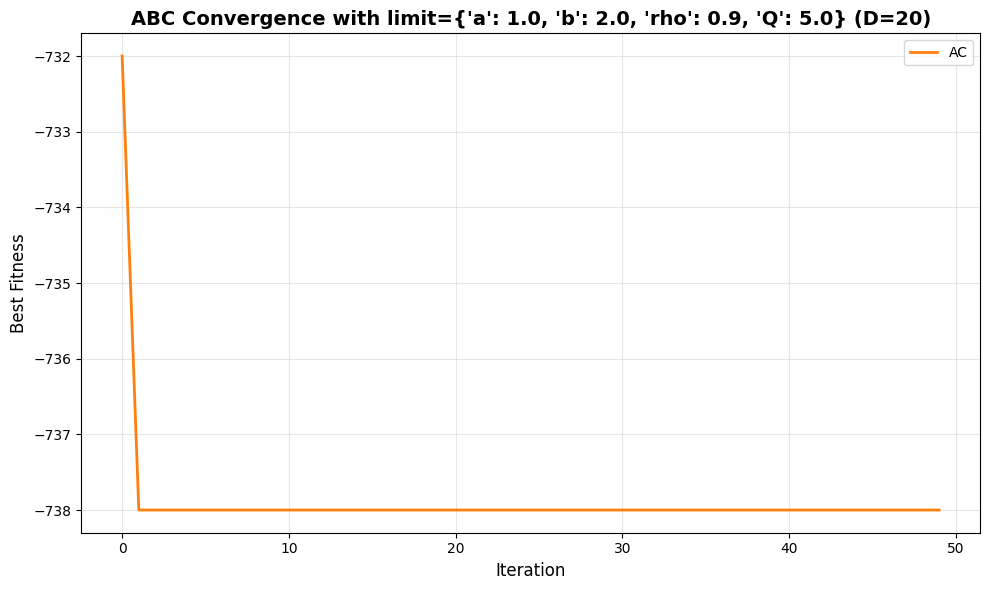


💡 Tip: Modify my_limit in the previous cell, then re-run both cells to see new results!


In [15]:
# Plot convergence curve
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(avg_history, linewidth=2, color='#ff7f0e', label='AC')
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Best Fitness', fontsize=12)
ax.set_title(f'ABC Convergence with limit={my_limit} (D={D})', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Linear scale to support negative values
ax.set_yscale('linear')

plt.tight_layout()
plt.show()

print(f"\n💡 Tip: Modify my_limit in the previous cell, then re-run both cells to see new results!")
